## Classifying Images With Scikit_Learn

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn .datasets import fetch_olivetti_faces

In [2]:
faces = fetch_olivetti_faces()
faces.DESCR

'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n'

In [3]:
faces.keys()

['images', 'data', 'target', 'DESCR']

In [4]:
faces.images.shape

(400, 64, 64)

In [5]:
faces.data.shape

(400, 4096)

In [6]:
faces.target.shape

(400,)

In [7]:
np.max(faces.data)

1.0

In [8]:
np.min(faces.data)

0.0

In [9]:
np.median(faces.data)

0.55785125

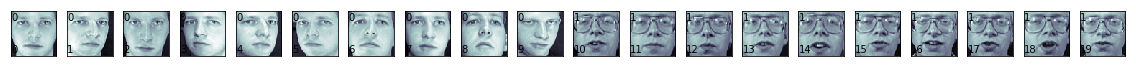

In [10]:
def print_faces(images , target , top_n):
    fig = plt.figure(figsize=(20,20))
    for i in range(top_n):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)
        p.text(0,14,str(target[i]))
        p.text(0,59,str(i))
print_faces(faces.images,faces.target,20)
plt.show()

In [11]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score,KFold
from scipy.stats import sem
svc_1 = SVC(kernel='linear')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)


C:\Python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
def evaluate_cross_validation(clf, X, y, K):
    cv = KFold(len(y) , K, shuffle =True, random_state = 0)
    scores = cross_val_score(clf,X,y,cv=cv)
    print scores
evaluate_cross_validation(svc_1,X_train,y_train,5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]


In [13]:
from sklearn import metrics
def train_and_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    print "Accuracy on training Set"
    print clf.score(X_train, y_train)
    print "Accuracy on testing Set"
    print clf.score(X_test, y_test)
    
    y_pred = clf.predict(X_test)
    print "Classification Report"
    print metrics.classification_report(y_test, y_pred)
    print "Confudion Matrix"
    print metrics.confusion_matrix(y_test, y_pred)
train_and_test(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training Set
1.0
Accuracy on testing Set
0.99
Classification Report
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19       

In [14]:
glasses = [
 (10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
 (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
 (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
 (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
 (330, 339), (358, 359), (360, 369)]


In [15]:
def create_target(segments):
    y = np.zeros(faces.target.shape[0])
    for (start, end) in segments:
        y[start:end+1] = 1
    return y
target_glasses = create_target(glasses)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_glasses, test_size=0.25, random_state=0)


In [17]:
svc_2 = SVC(kernel='linear')

In [18]:
evaluate_cross_validation(svc_2, X_train, y_train, 5)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]


In [19]:
train_and_test(svc_2, X_train, X_test, y_train, y_test)

Accuracy on training Set
1.0
Accuracy on testing Set
0.99
Classification Report
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

Confudion Matrix
[[66  1]
 [ 0 33]]


In [20]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]
y_test.shape

(10,)

In [21]:
select = np.ones(target_glasses.shape[0])

In [22]:
select[30:40] = 0

In [23]:
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

In [24]:
y_train.shape

(390,)

In [25]:
svc_3 = SVC(kernel='linear')

In [26]:
train_and_test(svc_3, X_train, X_test, y_train, y_test)

Accuracy on training Set
1.0
Accuracy on testing Set
0.9
Classification Report
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

Confudion Matrix
[[5 0]
 [1 4]]


## Naive Bayes Using Scikit_Lerarn


In [27]:
from sklearn.datasets import fetch_20newsgroups

In [28]:
news = fetch_20newsgroups(subset='all')

In [29]:
print type(news.data), type(news.target), type(news.target_names)

<type 'list'> <type 'numpy.ndarray'> <type 'list'>


In [30]:
print news.target_names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [31]:
len(news.data)

18846

In [32]:
len(news.target)

18846

In [33]:
news.data[0] #Content of the data at 0th index

u"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [34]:
news.target[0], news.target_names[news.target[0]] # Target_Name 

(10, 'rec.sport.hockey')

## Pre-Processing The Data

#### machine learning algorithms can work only on numeric data, so our next step will be to convert our text-based dataset to a numeric dataset

In [35]:
SPLIT_PERC = .75
split_size = int(len(news.data)*SPLIT_PERC)
X_train = news.data[:split_size]
X_test = news.data[split_size:]
y_train = news.target[:split_size]
y_test = news.target[split_size:]

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer


In [37]:
clf_1 = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [38]:
clf_2 = Pipeline([('vect', HashingVectorizer(non_negative=True)), ('clf', MultinomialNB())])

In [39]:
clf_3 = Pipeline([('vect', TfidfVectorizer()), ('clf', MultinomialNB())])

In [40]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem


In [41]:
clfs = [clf_1, clf_2, clf_3]
for clf in clfs:
    print clf
    evaluate_cross_validation(clf, news.data, news.target, 5)    

Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])
[ 0.85782493  0.85725657  0.84664367  0.85911382  0.8458477 ]
Pipeline(steps=[('vect', HashingVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
         dtype=<type 'numpy.float64'>, encoding=u'utf-8', input=u'content',
         lowercase=True, n_features=1048576, ngram_range=(1, 1),
         non_negative=True, norm=u'l2', preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
         tokenizer=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit

## Journey through The Titanic